# **1. Import libraries** <a class="anchor" id="6"></a>



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# **2. Load dataset** <a class="anchor" id="7"></a>

In [2]:
data_path = 'data.csv'

df = pd.read_csv(data_path)


# **3. EDA** <a class="anchor" id="8"></a>

In [3]:
# Check shape of the dataset
df.shape

(7050, 16)

In [4]:
# Preview the dataset
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
# View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [6]:
# Check for missing values in dataset
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [7]:
# Drop redundant columns
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [9]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


### Explore `status_type` variable

In [10]:
# view the labels in the variable
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [11]:
# view how many different types of variables are there
len(df['status_type'].unique())

4

# **4. Convert categorical variable into integers** <a class="anchor" id="10"></a>

In [12]:
# Encode 'status_type' column for visualization purposes
df["status_type"] = df["status_type"].map(
    {"video": 0, "photo": 1, "link": 2, "status": 3}
)


### Drop `status_id` and `status_published` variable from the dataset

In [13]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


# **5. Declare feature vector and target variable** <a class="anchor" id="9"></a>

In [15]:
# Separate features from target
X = df.drop(columns=["status_type"])  # Remove status_type from X for clustering
y = df["status_type"]  # For visualization only

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

In [17]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(data_scaled)

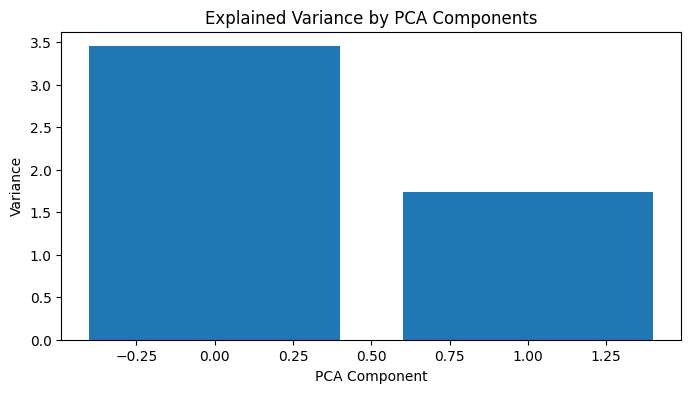

In [18]:
# Plot explained variance
plt.figure(figsize=(8, 4))
plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel("PCA Component")
plt.ylabel("Variance")
plt.title("Explained Variance by PCA Components")
plt.show()

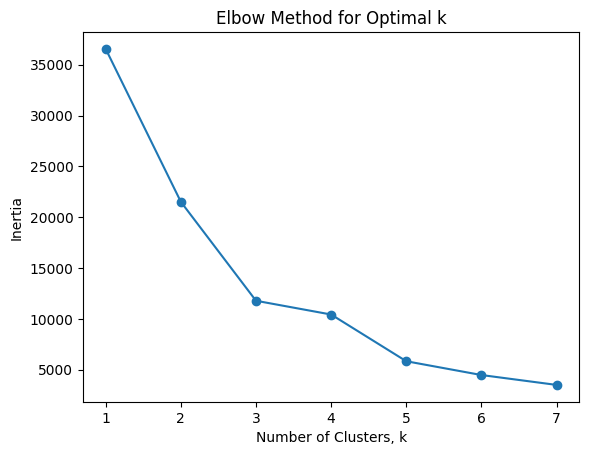

In [19]:
from sklearn.cluster import KMeans

# Find optimal number of clusters using Elbow Method
ks = range(1, 8)
inertias = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

plt.plot(ks, inertias, "-o")
plt.xlabel("Number of Clusters, k")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [20]:
# Apply K-means with chosen k
optimal_k = 4  # Based on elbow method
kmeans = KMeans(n_clusters=optimal_k)
labels = kmeans.fit_predict(X_pca)

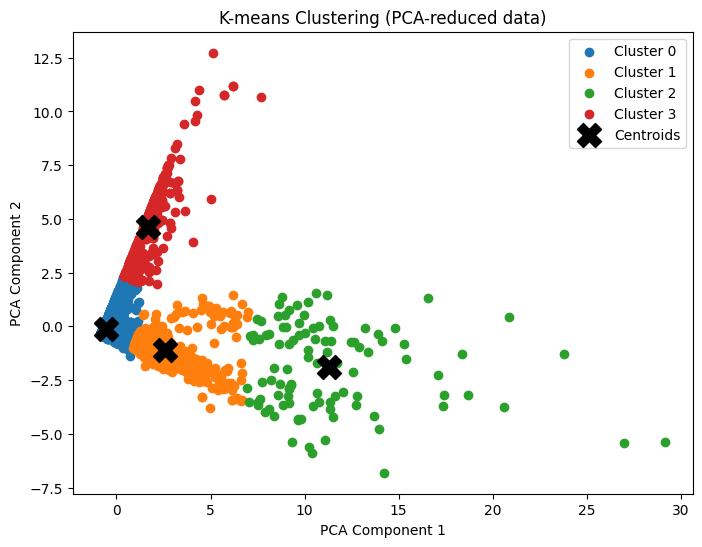

In [21]:
# Plot the clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f"Cluster {i}")
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    c="black",
    marker="X",
    label="Centroids",
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-means Clustering (PCA-reduced data)")
plt.legend()
plt.show()

In [22]:
# View cluster centers
kmeans.cluster_centers_

array([[-0.57276998, -0.14169442],
       [ 2.58350321, -1.10954068],
       [11.30811173, -1.90821343],
       [ 1.67842921,  4.61382434]])

In [23]:
kmeans.inertia_

7154.250942151175

In [24]:
from sklearn.cluster import KMeans

# Running k-means with the optimal k (assumed from the elbow plot)
optimal_k = 4  # Adjust based on the elbow method result
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# Evaluate clustering with inertia
inertia = kmeans.inertia_
print(f"Inertia for k={optimal_k}: {inertia:.2f}")

Inertia for k=4: 32616.93


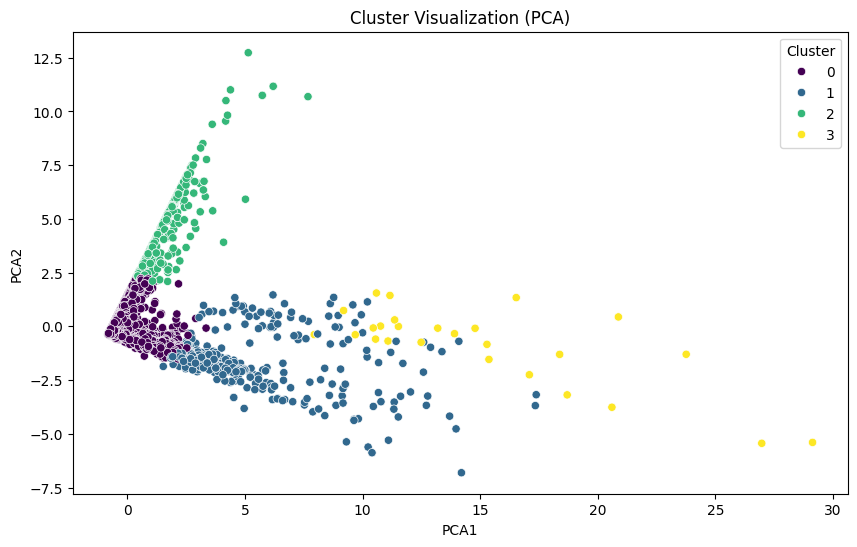

In [25]:

# Visualizing clusters with PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
df['PCA1'], df['PCA2'] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette="viridis")
plt.title("Cluster Visualization (PCA)")
plt.show()
